In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

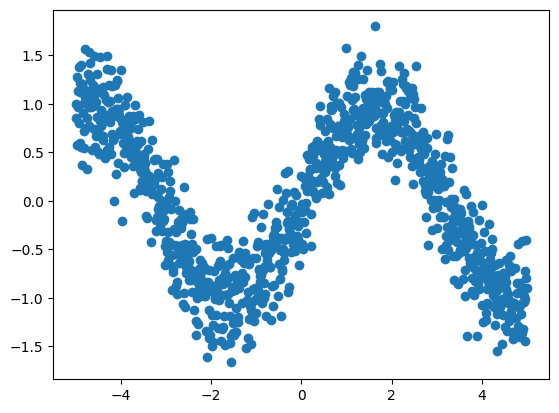

In [6]:
n = 1000
x_data = torch.linspace(-5, 5, n)
nu, scale = torch.tensor(0.), torch.tensor(0.3)
noise = torch.FloatTensor([torch.normal(nu, scale) for _ in range(n)])
y_data = torch.sin(x_data) + noise
plt.scatter(x_data, y_data);

In [45]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 32)
        self.linear2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.optimazer = torch.optim.SGD(self.parameters(), lr=1e-3)

    def forward(self, _input):
        hidden = self.linear1(_input)
        hidden = self.relu(hidden)
        output = self.linear2(hidden)
        return output

    def learn(self, x, y, step_n=1000):
        for step in range(step_n):
            y_pred = self.forward(x)
            loss = torch.mean((y - y_pred) ** 2)
            if step % 50 == 0:
                print(f'step: {step}, loss: {loss.data}')
            
            loss.backward()
            self.optimazer.step()
            self.optimazer.zero_grad()
        


step: 0, loss: 0.705089271068573
step: 50, loss: 0.5318801999092102
step: 100, loss: 0.5104513764381409
step: 150, loss: 0.49104976654052734
step: 200, loss: 0.47308531403541565
step: 250, loss: 0.45633664727211
step: 300, loss: 0.4406413435935974
step: 350, loss: 0.4258715808391571
step: 400, loss: 0.4119172990322113
step: 450, loss: 0.39870595932006836
step: 500, loss: 0.38616320490837097
step: 550, loss: 0.3742280900478363
step: 600, loss: 0.36285126209259033
step: 650, loss: 0.3520042896270752
step: 700, loss: 0.3416508734226227
step: 750, loss: 0.33175283670425415
step: 800, loss: 0.3222931921482086
step: 850, loss: 0.3132517337799072
step: 900, loss: 0.3046016991138458
step: 950, loss: 0.2963244616985321


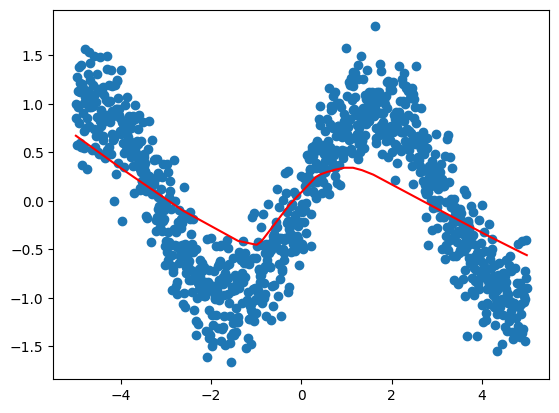

In [46]:
network = Network()
network.learn(x_data.reshape(-1, 1), y_data.reshape(-1, 1))
y_pred = network(x_data.reshape(-1, 1))

plt.scatter(x_data.data, y_data.data)
plt.plot(x_data.data, y_pred.data, c='r')
plt.show()